In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

from plotnine import options
from plotnine import *
from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [2]:
# geting data for all of Canada
total_data = pd.read_csv('https://health-infobase.canada.ca/src/data/covidLive/covid19-download.csv')

total_data.head()

,pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,...,numdeaths_last14,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7
0,35,Ontario,Ontario,2020-01-31,NaN,3,0.0,0.0,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,59,British Columbia,Colombie-Britannique,2020-01-31,NaN,1,0.0,0.0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Canada,Canada,2020-01-31,NaN,4,0.0,0.0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35,Ontario,Ontario,2020-02-08,NaN,3,0.0,0.0,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,59,British Columbia,Colombie-Britannique,2020-02-08,NaN,4,0.0,0.0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# extracing only data on Ontario
ontario_filter = total_data['prname'] == 'Ontario'
ontario_data1 = total_data.loc[ontario_filter, :]

ontario_data1.head()

,pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,...,numdeaths_last14,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7
0,35,Ontario,Ontario,2020-01-31,NaN,3,0.0,0.0,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35,Ontario,Ontario,2020-02-08,NaN,3,0.0,0.0,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,35,Ontario,Ontario,2020-02-16,NaN,3,0.0,0.0,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,35,Ontario,Ontario,2020-02-21,NaN,3,0.0,0.0,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,35,Ontario,Ontario,2020-02-24,NaN,4,0.0,0.0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


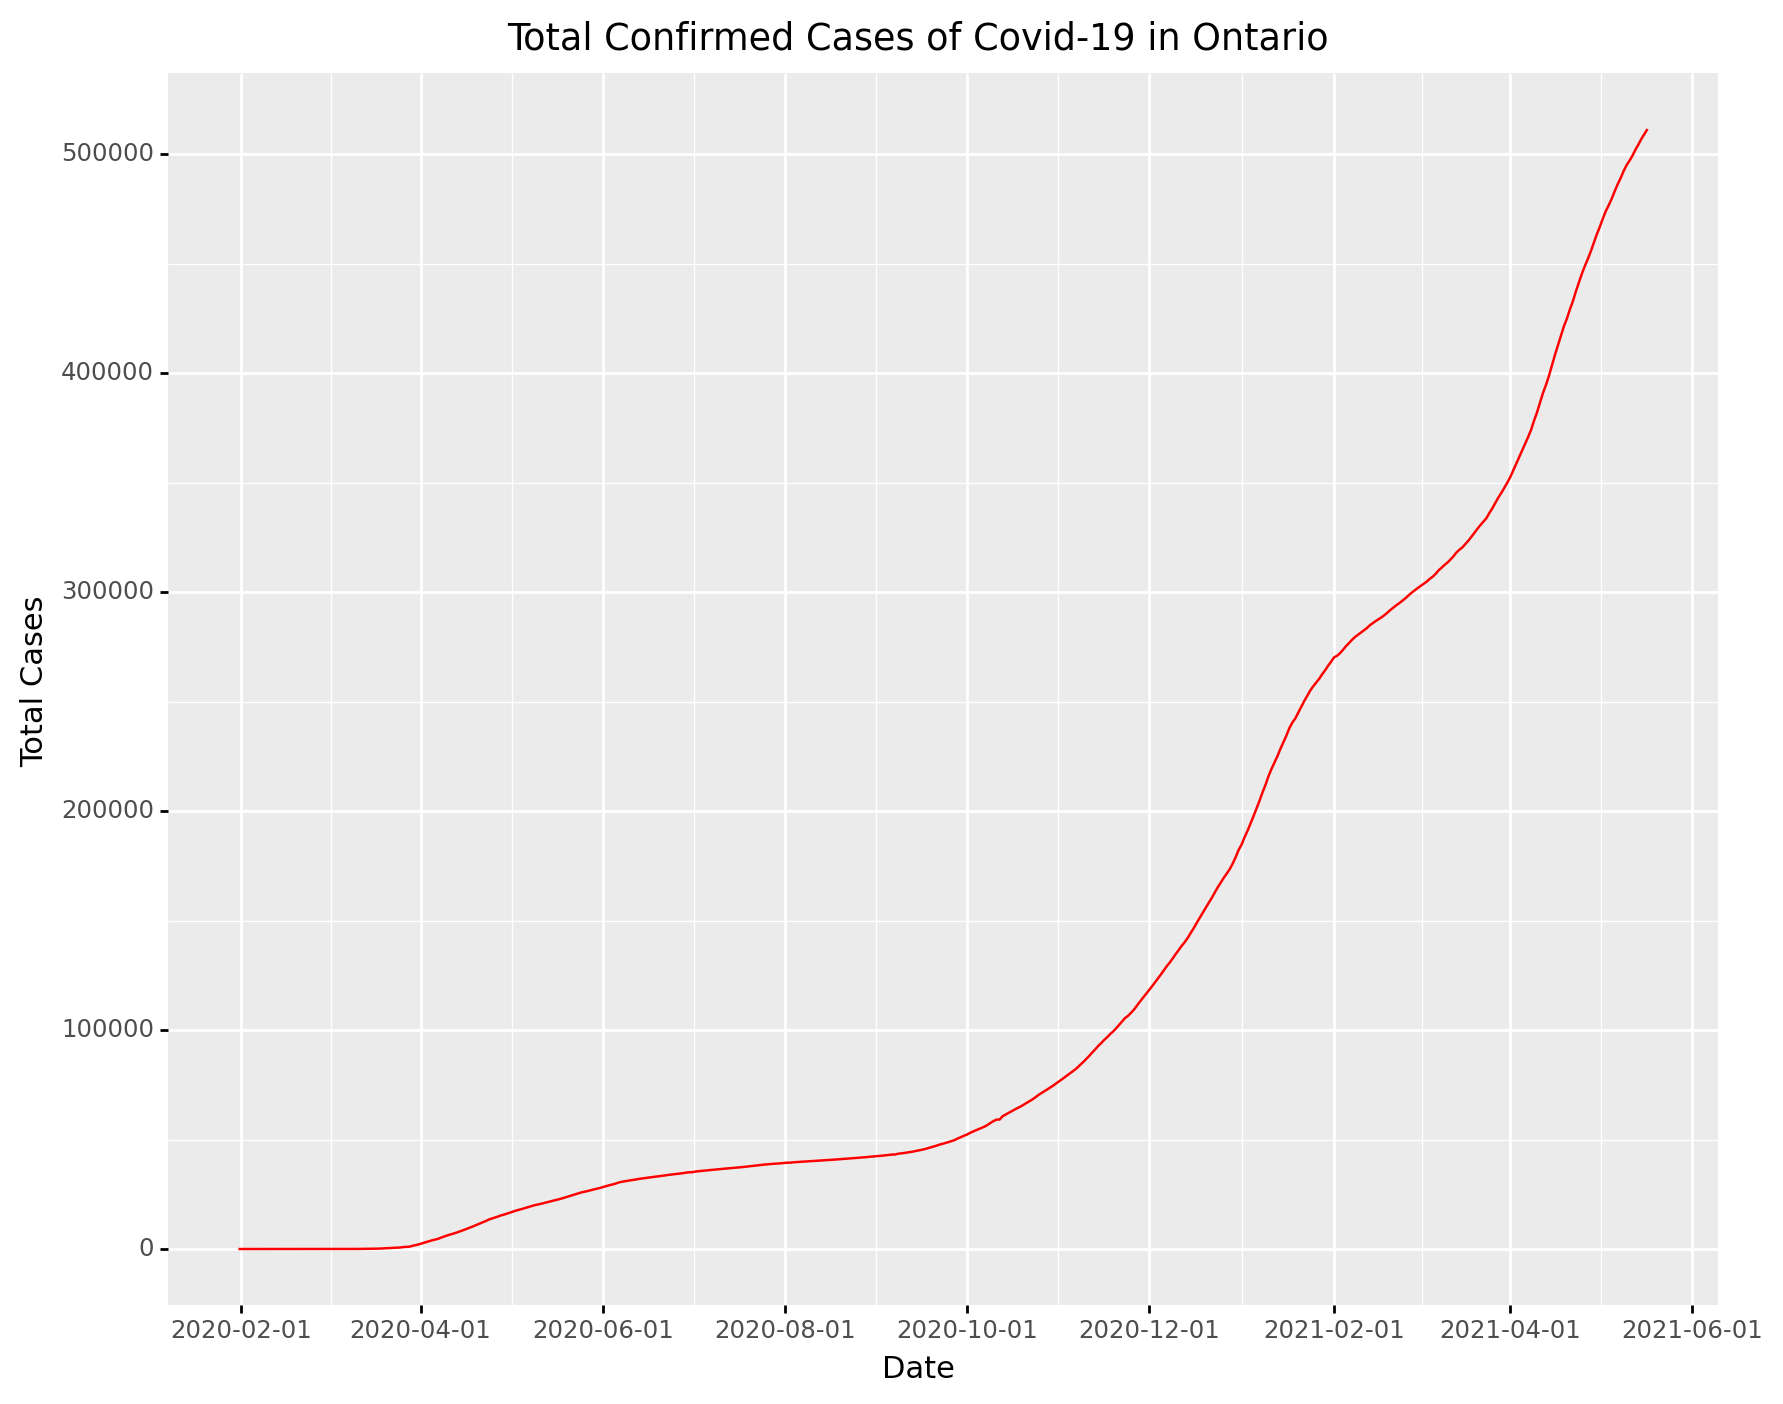

In [4]:
# plotting total cases
%config InlineBackend.figure_format = 'retina'
options.figure_size = (10, 8)

(ggplot(data=ontario_data1, mapping=aes(x='date', y='numtotal', group=1))
 + scale_x_datetime(breaks=date_breaks('2 months'))
 + geom_line(color='red')
 + labs(title='Total Confirmed Cases of Covid-19 in Ontario', x='Date', y='Total Cases')

).draw();

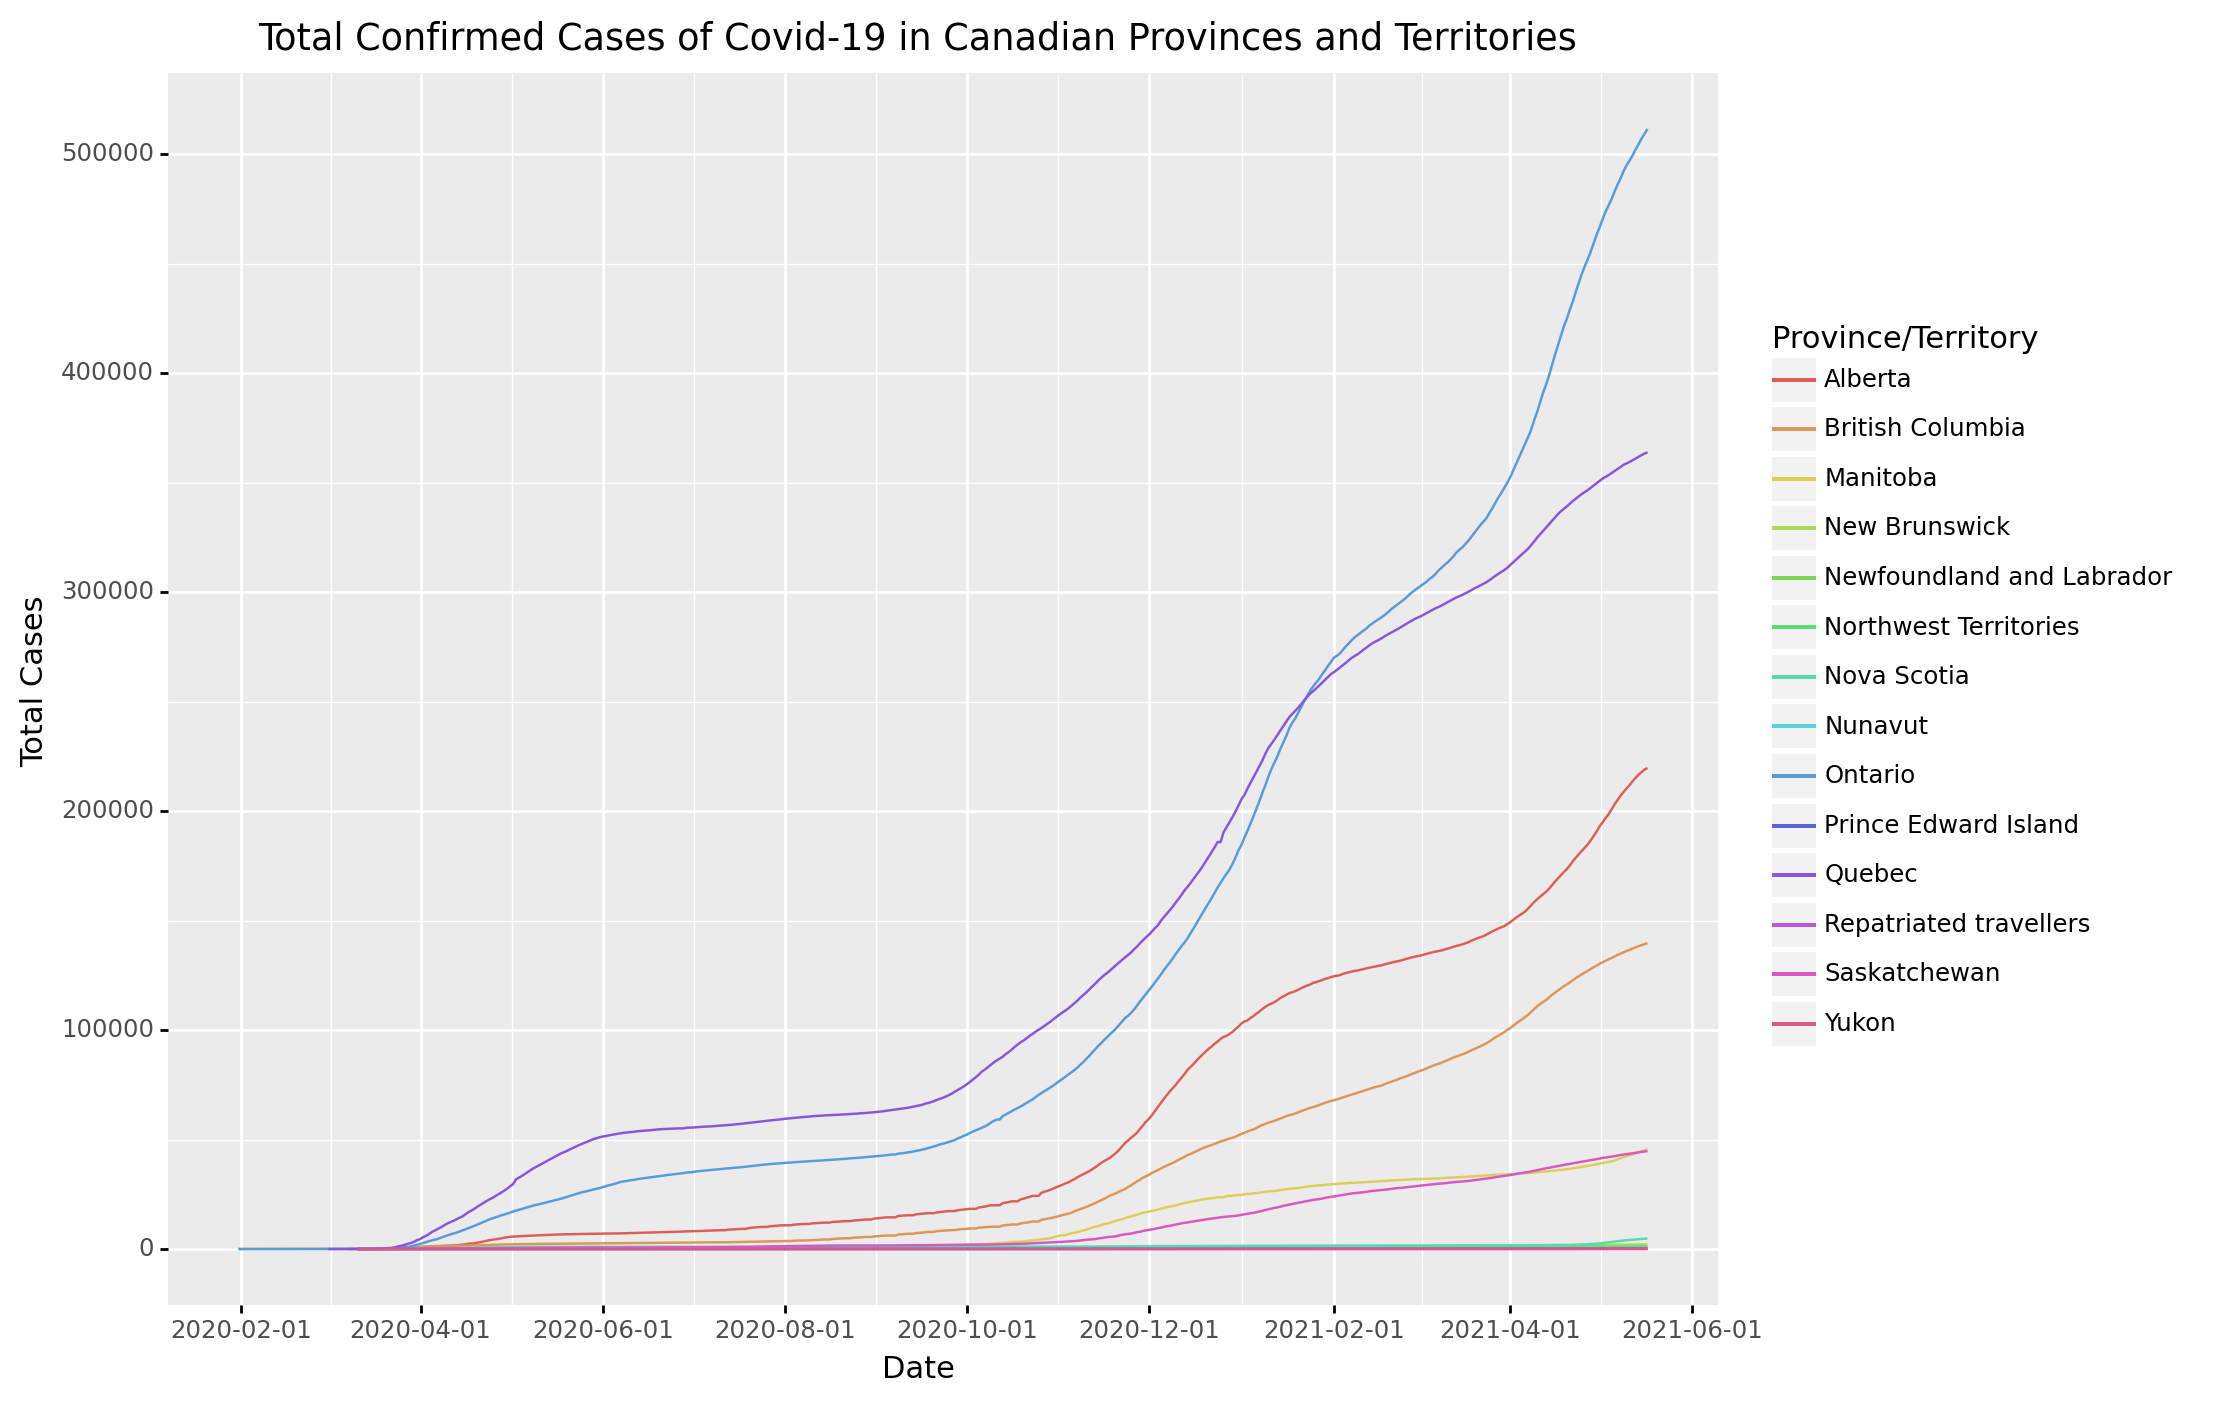

In [5]:
# comparing between provinces

total_data_trim = total_data[total_data.prname != 'Canada']

(ggplot(data=total_data_trim, mapping=aes(x='date', y='numtotal', color='prname', group='prname'))
 + scale_x_datetime(breaks=date_breaks('2 months'))
 + geom_line()
 + labs(
     title='Total Confirmed Cases of Covid-19 in Canadian Provinces and Territories', 
     x='Date', 
     y='Total Cases', 
     color='Province/Territory'
 )
).draw();

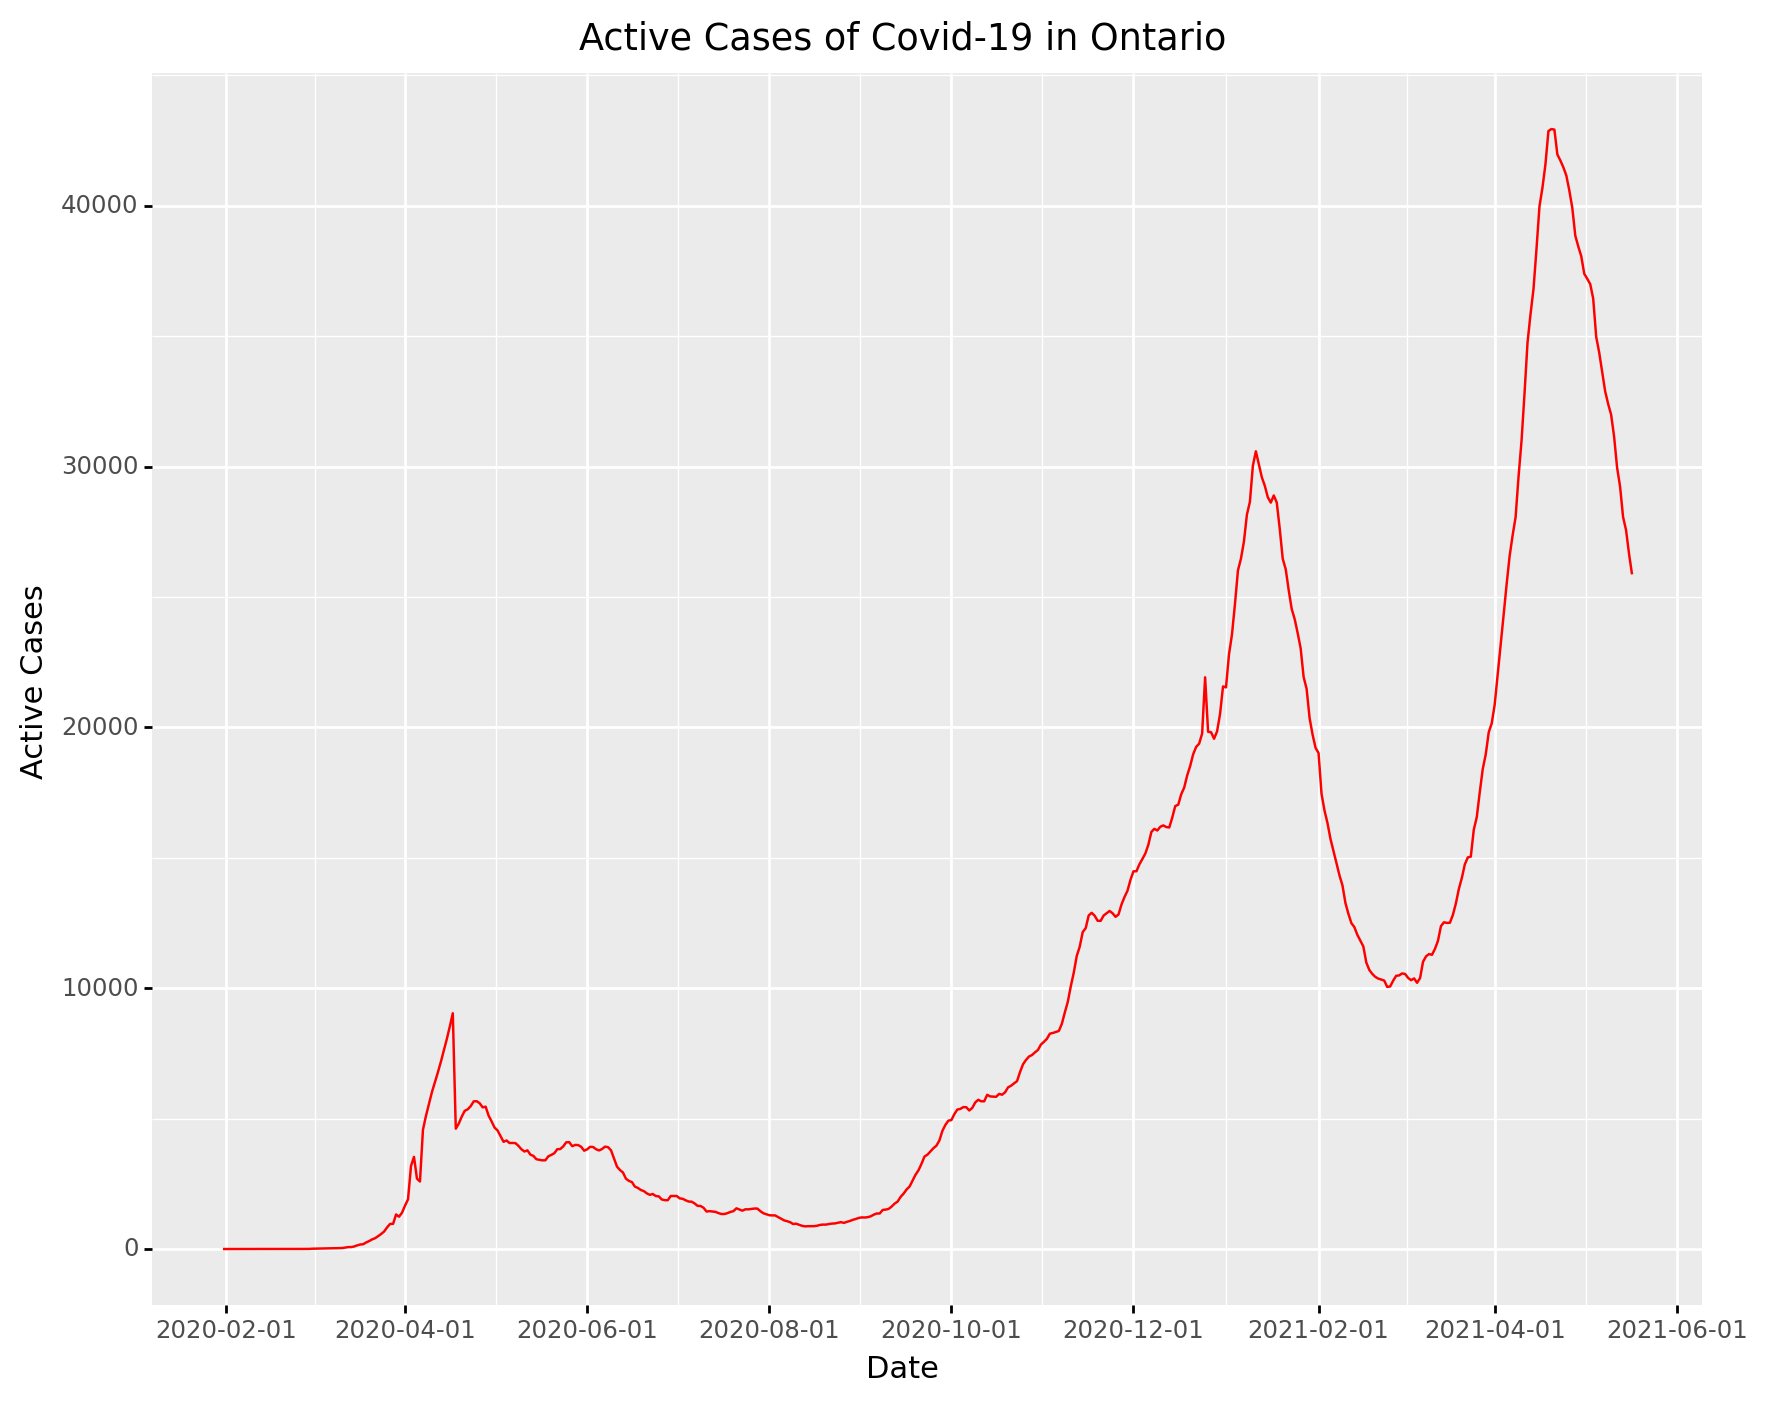

In [6]:
# plotting active cases
(ggplot(data=ontario_data1, mapping=aes(x='date', y='numactive', group=1))
 + scale_x_datetime(breaks=date_breaks('2 months'))
 + geom_line(color='red')
 + labs(title='Active Cases of Covid-19 in Ontario', x='Date', y='Active Cases')
).draw();

In [7]:
# extracting number of hospitalized, ICU, ventilated
ontario_data2 = pd.read_csv('https://data.ontario.ca/dataset/f4f86e54-872d-43f8-8a86-3892fd3cb5e6/resource/ed270bb8-340b-41f9-a7c6-e8ef587e6d11/download/covidtesting.csv')

groups = [
    'Reported Date', 'Number of patients hospitalized with COVID-19', 
    'Number of patients in ICU due to COVID-19', 
    'Number of patients in ICU on a ventilator due to COVID-19'
]

hospital_data = ontario_data2[groups]
hospital_data.head()

,Reported Date,Number of patients hospitalized with COVID-19,Number of patients in ICU due to COVID-19,Number of patients in ICU on a ventilator due to COVID-19
0,2020-01-26,NaN,NaN,NaN
1,2020-01-27,NaN,NaN,NaN
2,2020-01-28,NaN,NaN,NaN
3,2020-01-30,NaN,NaN,NaN
4,2020-01-31,NaN,NaN,NaN


In [8]:
# data wrangling
hospital_data = hospital_data.dropna(thresh=2)
hospital_data.columns = ['Date', 'In Hospital', 'In ICU', 'In ICU with Ventilator']

hospital_data = pd.melt(hospital_data, id_vars=['Date'], value_vars=['In Hospital', 'In ICU', 'In ICU with Ventilator'])
hospital_data.columns = ['Date', 'Patient Type', 'Cases']

hospital_data.head()

,Date,Patient Type,Cases
0,2020-04-02,In Hospital,405.0
1,2020-04-03,In Hospital,462.0
2,2020-04-04,In Hospital,506.0
3,2020-04-05,In Hospital,523.0
4,2020-04-06,In Hospital,589.0


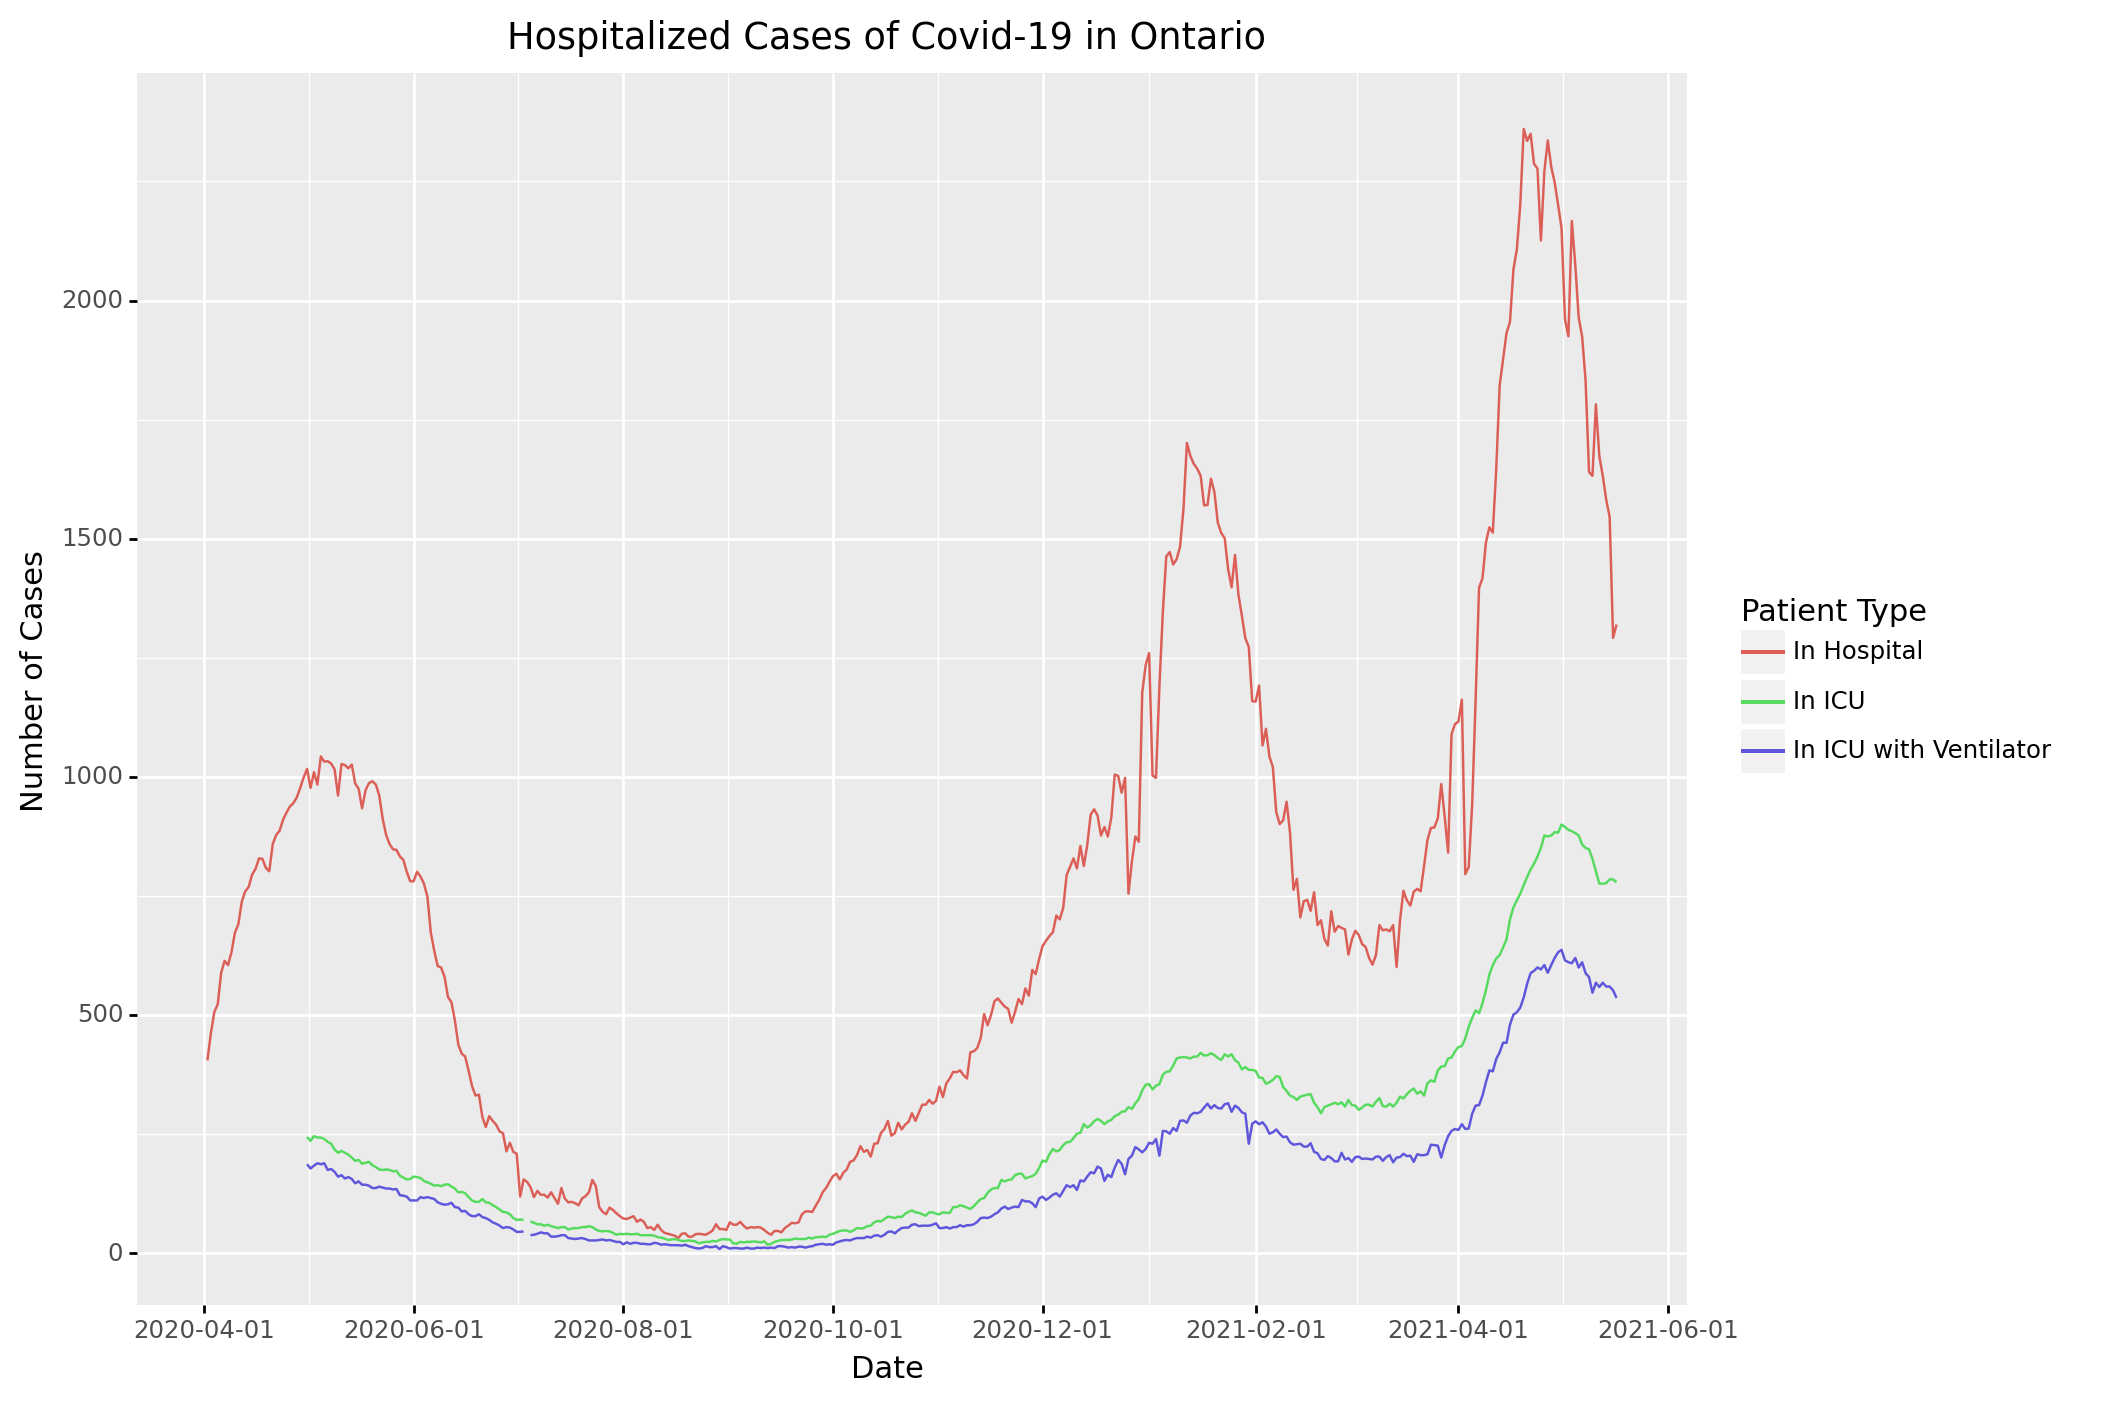

In [9]:
# plotting active cases
(ggplot(data=hospital_data, mapping=aes(x='Date', y='Cases', group='Patient Type', colour='Patient Type'))
 + scale_x_datetime(breaks=date_breaks('2 months'))
 + geom_line()
 + labs(title='Hospitalized Cases of Covid-19 in Ontario', x='Date', y='Number of Cases')
).draw();